In [116]:
"""
Created on Tuesday 21 Oct 2022
Author: ZMW
"""
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [95]:
#data path
path = os.getcwd()
dirname = os.path.dirname(path)
data_file = 'data/201022_BDNF_ELISA.xlsx'
data_path = os.path.join(dirname,data_file)

In [109]:
#Load the fitted dataset
data = pd.read_excel(data_path)
data = data.iloc[9:17,1:8]#slice rows and columns where data exist
data.columns = ['STD','SYN','DUP_SYN','IN','DUP_IN','STD','STD_CONC']


#### columns names
STD = standard curve\
SYN = syringe\
DUP_SYN = duplicate syringe\
IN = Infusion kit\
DUP_IN = duplicate infusion kit\
STD = standard curve\
STD_CONC = standard concentration

In [114]:
data

,STD,SYN,DUP_SYN,IN,DUP_IN,STD,STD_CONC
9,3.996,4.9404,4.5471,4.5187,3.9315,2.8018,16.000
10,2.9149,3.6343,4.3342,3.2844,3.5228,1.9956,6.400
11,1.9001,2.2191,1.8849,2.0781,1.6448,1.2362,2.560
12,1.0382,0.5515,0.5131,0.4831,0.4924,0.7057,1.024
13,0.5315,0.2313,0.2121,0.1389,0.1503,0.3465,0.410
14,0.2877,0.1176,0.1179,0.1092,0.1102,0.2246,0.160
15,0.1768,0.1035,0.1047,0.1003,0.1118,0.1615,0.066
16,0.0992,0.0982,0.1039,0.1062,0.1056,0.1039,0.000


<AxesSubplot:xlabel='DUP_IN', ylabel='STD_CONC'>

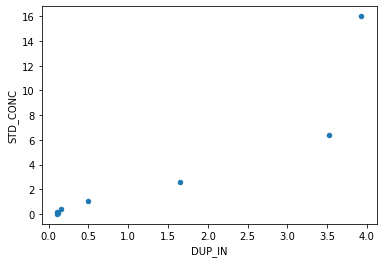

In [122]:
data.plot.scatter(x='DUP_IN',y='STD_CONC')

### Fit Several Curves

In [120]:
# fit polynomial models up to degree 5
model1 = np.poly1d(np.polyfit(data['DUP_IN'],data['STD_CONC'],1))
model2 = np.poly1d(np.polyfit(data.DUP_IN,data['STD_CONC'],2))
model3 = np.poly1d(np.polyfit(data.DUP_IN,data['STD_CONC'],3))
model4 = np.poly1d(np.polyfit(data.DUP_IN,data['STD_CONC'],4))
model5 = np.poly1d(np.polyfit(data.DUP_IN,data['STD_CONC'],5))

#create scaterplot
polyline = np.linspace(1, 15, 50)
plt.scatter(data.DUP_IN,data.STD_CONC)

#add fitted polynomial lines to scatterplot
plt.plot(polyline,model1(polyline),color='green')
plt.plot(polyline, model2(polyline),color='red')
plt.plot(polyline, model3(polyline),color='purple')
plt.plot(polyline, model4(polyline),color='blue')
plt.plot(polyline, model5(polyline),color='orange')
plt.show()

ValueError: data type <class 'numpy.object_'> not inexact